In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
from scipy.stats import zscore

In [64]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [69]:
from sklearn.preprocessing import StandardScaler

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
iris=pd.read_csv('iris.csv')

In [5]:
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Basic EDA

In [6]:
iris.shape

(150, 5)

In [7]:
iris.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

In [8]:
iris.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class            object
dtype: object

the target is class which is categorical so this is a classification problem

The dependent variable only is categorical, rest are continuos

In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


here we can see that there are no null values:

outliers may be in petal length

# Variable Identification

In [16]:
print(iris['class'].nunique())
print(iris['class'].unique())
print(iris['class'].value_counts())

3
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: class, dtype: int64


In [22]:
print(iris['sepal length'].nunique())
print(iris['sepal length'].unique())
print(iris['sepal length'].value_counts())

35
[5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
5.0    10
6.3     9
5.1     9
6.7     8
5.7     8
5.5     7
5.8     7
6.4     7
6.0     6
4.9     6
6.1     6
5.4     6
5.6     6
6.5     5
4.8     5
7.7     4
6.9     4
5.2     4
6.2     4
4.6     4
7.2     3
6.8     3
4.4     3
5.9     3
6.6     2
4.7     2
7.6     1
7.4     1
4.3     1
7.9     1
7.3     1
7.0     1
4.5     1
5.3     1
7.1     1
Name: sepal length, dtype: int64


In [21]:
print(iris['petal length'].nunique())
print(iris['petal length'].unique())
print(iris['petal length'].value_counts())

43
[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
1.5    14
1.4    12
5.1     8
4.5     8
1.3     7
1.6     7
5.6     6
4.0     5
4.9     5
4.7     5
4.8     4
1.7     4
4.4     4
4.2     4
5.0     4
4.1     3
5.5     3
4.6     3
6.1     3
5.7     3
3.9     3
5.8     3
1.2     2
1.9     2
6.7     2
3.5     2
5.9     2
6.0     2
5.4     2
5.3     2
3.3     2
4.3     2
5.2     2
6.3     1
1.1     1
6.4     1
3.6     1
3.7     1
3.0     1
3.8     1
6.6     1
6.9     1
1.0     1
Name: petal length, dtype: int64


In [23]:
print(iris['petal width'].nunique())
print(iris['petal width'].unique())
print(iris['petal width'].value_counts())

22
[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
0.2    28
1.3    13
1.5    12
1.8    12
1.4     8
2.3     8
1.0     7
0.3     7
0.4     7
0.1     6
2.0     6
2.1     6
1.2     5
1.9     5
1.6     4
2.5     3
2.2     3
2.4     3
1.1     3
1.7     2
0.6     1
0.5     1
Name: petal width, dtype: int64


In [24]:
print(iris['sepal width'].nunique())
print(iris['sepal width'].unique())
print(iris['sepal width'].value_counts())

23
[3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]
3.0    26
2.8    14
3.2    13
3.4    12
3.1    12
2.9    10
2.7     9
2.5     8
3.5     6
3.8     6
3.3     6
2.6     5
2.3     4
3.6     3
2.4     3
2.2     3
3.7     3
3.9     2
4.2     1
4.1     1
4.4     1
2.0     1
4.0     1
Name: sepal width, dtype: int64


there are three categories so we can't apply logistic regression

# Data Visualization

# Univariate Analysis

use distplot, histograms and boxplots to check for the distribution, skewness and outliers

we can check mean, median and std of data from describe function above

sepal length       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal width     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal length          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal width        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

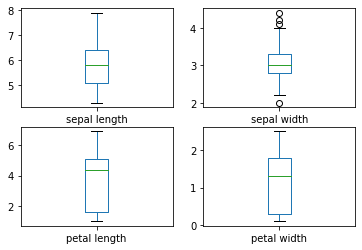

In [18]:
iris.plot(kind='box', subplots=True, layout=(2,2))

there are outliers in sepal width

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F3B4D14308>,
      dtype=object)

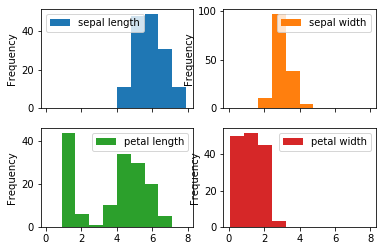

In [25]:
iris.plot(kind='hist', subplots=True, layout=(2,2))

In [26]:
# another method to draw boxplot and distplot all at a time

In [28]:
col=iris.columns.values
col

array(['sepal length', 'sepal width', 'petal length', 'petal width',
       'class'], dtype=object)

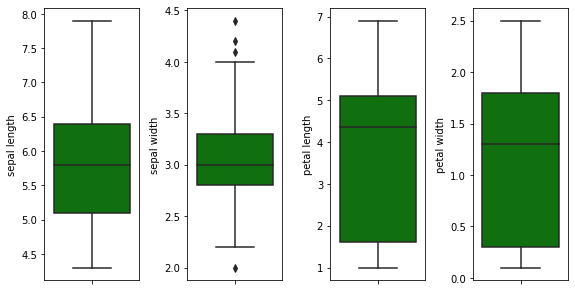

In [30]:
plt.figure(figsize=(20,20))
for i in range(len(col)):
    if i==4:
        continue
    plt.subplot(5,10,i+1)
    sns.boxplot(iris[col[i]], orient='v', color='green')
    plt.tight_layout()

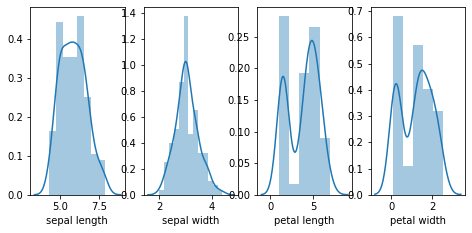

In [33]:
plt.figure(figsize=(20,20))
for i in range(len(col)):
    if i==4:
        continue
    plt.subplot(5,10,i+1)
    sns.distplot(iris[col[i]])

In [35]:
# check petal length and petal width closely

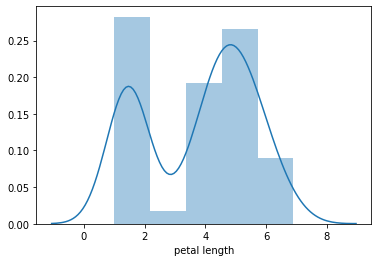

In [36]:
sns.distplot(iris['petal length'])

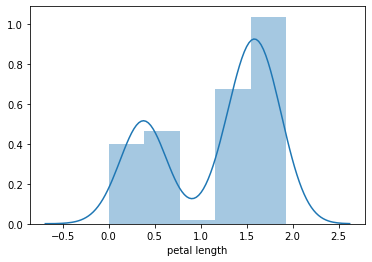

In [37]:
sns.distplot(np.log(iris['petal length']))

no use of log transformtion as the original data is not right skewed

there are no categorical variables in the features

# Bivariate Analysis

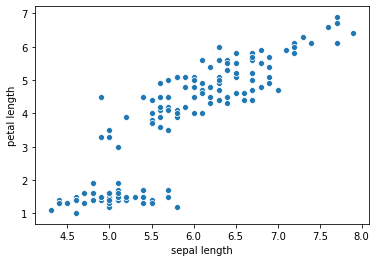

In [38]:
sns.scatterplot(x='sepal length', y='petal length', data=iris)

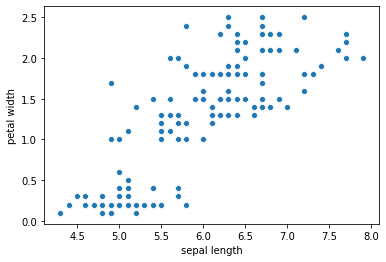

In [39]:
sns.scatterplot(x='sepal length', y='petal width', data=iris)

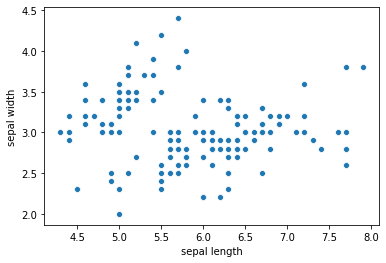

In [40]:
sns.scatterplot(x='sepal length', y='sepal width', data=iris)

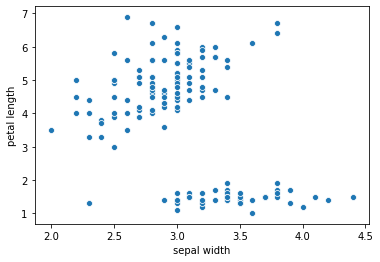

In [41]:
sns.scatterplot(x='sepal width', y='petal length', data=iris)

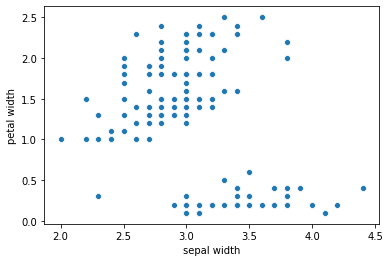

In [42]:
sns.scatterplot(x='sepal width', y='petal width', data=iris)

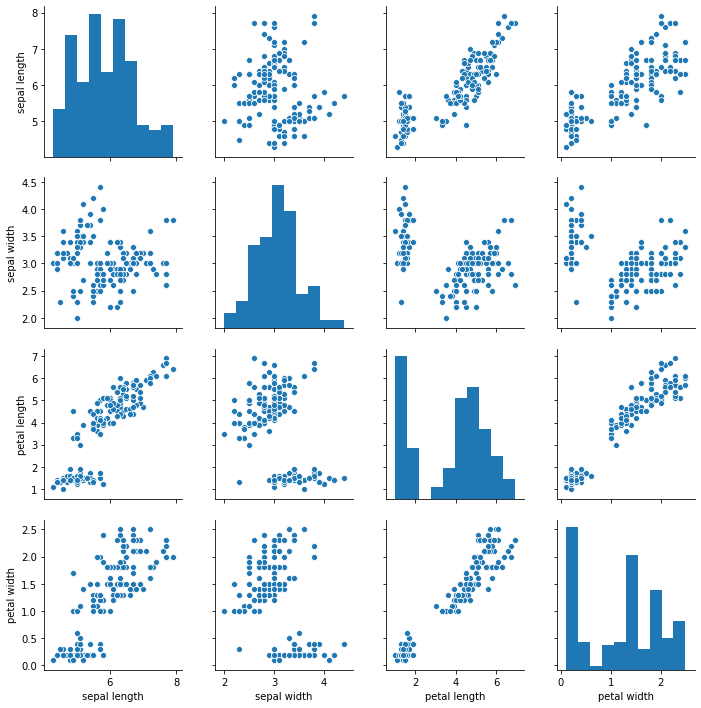

In [43]:
sns.pairplot(iris)

strong correlation between petal length and petal width

petal length and sepal length also have correlation

no negative correlation

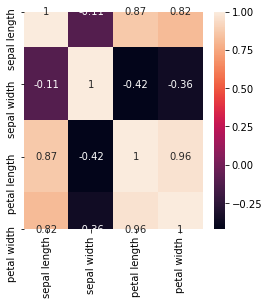

In [46]:
plt.figure(figsize=(4,4))
sns.heatmap(iris.corr(), annot=True)
plt.show()

there are a few negative correlation as we can see

# Missing Values

In [47]:
iris.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

there are no missing values

# Outliers

In [52]:
iris_num=iris.iloc[:,0:-1]

In [57]:
z=np.abs(zscore(iris_num))

In [58]:
print(np.where(z>3))

(array([15], dtype=int64), array([1], dtype=int64))


In [59]:
z[15,1]

3.1146839106774356

In [60]:
iris_num=iris_num[(z<3).all(axis=1)]

In [61]:
iris_num['class']=iris['class']

In [62]:
iris_num

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


There might be a problem with the index of iris_num and iris['class'] with this method

In [65]:
z=zscore(iris.iloc[:,0:-1])

In [66]:
iris=iris[(z<3).all(axis=1)]

# data transformation

In [67]:
# Now we'll create a copy of iris and apply data transformation on that only and finally 
# compare the result between iris and iris copy

In [68]:
iris_copy=iris.copy()

In [70]:
sc=StandardScaler()

In [72]:
iris_copy=sc.fit_transform(iris_copy.iloc[:,0:-1])

In [75]:
iris_copy=pd.DataFrame(iris_copy)

In [76]:
iris_copy['class']=iris['class']

In [77]:
iris_copy

,0,1,2,3,class
0,-0.898927,1.085374,-1.352896,-1.320511,Iris-setosa
1,-1.140478,-0.107257,-1.352896,-1.320511,Iris-setosa
2,-1.382029,0.369796,-1.409888,-1.320511,Iris-setosa
3,-1.502804,0.131269,-1.295904,-1.320511,Iris-setosa
4,-1.019702,1.323900,-1.352896,-1.320511,Iris-setosa
...,...,...,...,...,...
144,1.033482,-0.107257,0.812808,1.441440,Iris-virginica
145,0.550380,-1.299887,0.698824,0.915354,Iris-virginica
146,0.791931,-0.107257,0.812808,1.046876,Iris-virginica
147,0.429604,0.846848,0.926793,1.441440,Iris-virginica


In [78]:
iris

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


a comparison between iris and iris_copy

# Model Selection

we can choose out of Decision tree, knn, svm, Multinomial Naive bayes

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
from sklearn.svm import SVC

In [82]:
from sklearn.naive_bayes import MultinomialNB

In [85]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
x=iris.iloc[:,0:-1]
x.shape

(149, 4)

In [89]:
y=iris.iloc[:,-1]
y.shape

(149,)

In [90]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.22,random_state=45)

In [91]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(116, 4)
(33, 4)
(116,)
(33,)


In [92]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y=model.predict(x_test)
accuracy_score(y,y_test)

0.9090909090909091

In [83]:
model_list=[DecisionTreeClassifier(), KNeighborsClassifier(), SVC(), MultinomialNB()]

In [95]:
for m in model_list:
        print(str(m))
        print('\n')
        m.fit(x_train,y_train)
        y=m.predict(x_test)
        print(accuracy_score(y,y_test))
        print(classification_report(y,y_test))
        print(confusion_matrix(y,y_test))
        print('\n')
        print('\n')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


0.9090909090909091
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.88      0.78      0.82         9
 Iris-virginica       0.86      0.92      0.89        13

       accuracy                           0.91        33
      macro avg       0.91      0.90      0.90        33
   weighted avg       0.91      0.91      0.91        33

[[11  0  0]
 [ 0  7  2]
 [ 0  1 12]]




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_ne

In [97]:
for i in range(5,17):
        m=KNeighborsClassifier(n_neighbors=i)
        print(str(m))
        print('\n')
        m.fit(x_train,y_train)
        y=m.predict(x_test)
        print(accuracy_score(y,y_test))
        print(classification_report(y,y_test))
        print(confusion_matrix(y,y_test))
        print('\n')
        print('\n')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


0.9393939393939394
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.88      0.88      0.88         8
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.94        33
      macro avg       0.93      0.93      0.93        33
   weighted avg       0.94      0.94      0.94        33

[[11  0  0]
 [ 0  7  1]
 [ 0  1 13]]




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


0.9090909090909091
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.88

the best one is at default value 10

In [98]:
m=SVC(kernel='poly')
m.fit(x_train,y_train)
y=m.predict(x_test)
print(accuracy_score(y,y_test))
print(classification_report(y,y_test))
print(confusion_matrix(y,y_test))

0.9696969696969697
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        33
      macro avg       0.98      0.96      0.97        33
   weighted avg       0.97      0.97      0.97        33

[[11  0  0]
 [ 0  8  1]
 [ 0  0 13]]


the best model is svc poly

# Iris_copy

In [99]:
p=iris_copy.iloc[:,0:-1]
p.shape

(149, 4)

In [100]:
q=iris.iloc[:,-1]
q.shape

(149,)

In [101]:
p_train, p_test, q_train, q_test=train_test_split(p,q,test_size=0.22,random_state=45)

In [105]:
print(p_train.shape)
print(p_test.shape)
print(q_train.shape)
print(q_test.shape)

(116, 4)
(33, 4)
(116,)
(33,)


In [114]:
model_list=[DecisionTreeClassifier(criterion='gini'), DecisionTreeClassifier(criterion='entropy'),
            KNeighborsClassifier(), 
            SVC(kernel='poly'), SVC(kernel='rbf'), MultinomialNB()]

In [115]:
for m in model_list:
        print(str(m))
        print('\n')
        m.fit(p_train,q_train)
        q=m.predict(p_test)
        print(accuracy_score(q,q_test))
        print(classification_report(q,q_test))
        print(confusion_matrix(q,q_test))
        print('\n')
        print('\n')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


0.8787878787878788
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.88      0.70      0.78        10
 Iris-virginica       0.79      0.92      0.85        12

       accuracy                           0.88        33
      macro avg       0.89      0.87      0.87        33
   weighted avg       0.88      0.88      0.88        33

[[11  0  0]
 [ 0  7  3]
 [ 0  1 11]]




DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_n

ValueError: Input X must be non-negative

the accuracy scores are better for iris data, 

standard scaling didn't improve the results

Also, MultinomialNB only takes non-negative inputs so it showed an error

# Check for over-fitting and under-fitting

In [118]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [117]:
model_list=[DecisionTreeClassifier(criterion='gini'), DecisionTreeClassifier(criterion='entropy'),
            KNeighborsClassifier(), 
            SVC(kernel='poly'), SVC(kernel='rbf'), MultinomialNB()]

In [130]:
for i in range(5,11):
    print("cv= ", i)
    print('\n')
    for m in model_list:
        print(str(m))
        print('\n')
        score=cross_val_score(m, x, y, cv=i)
        print(score)
        print('\n')
        print(score.mean(), score.std())
        print('\n')
        q=cross_val_predict(m, x, y, cv=i)
        print(accuracy_score(q,y))
        print(classification_report(q,y))
        print(confusion_matrix(q,y))
        print('\n')
        print('\n')

cv=  5


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


[0.96666667 0.96666667 0.9        0.96666667 1.        ]


0.9600000000000002 0.03265986323710903


0.959731543624161
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        49
Iris-versicolor       0.96      0.92      0.94        52
 Iris-virginica       0.92      0.96      0.94        48

       accuracy                           0.96       149
      macro avg       0.96      0.96      0.96       149
   weighted avg       0.96      0.96      0.96       149

[[49  0  0]
 [ 0 48  4]
 [ 0  2 46]]




DecisionTreeClassifier(

[0.95652174 1.         0.9047619  0.85714286 0.95238095 1.
 1.        ]


0.9529724933451641 0.05092752026035111


0.9530201342281879
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        49
Iris-versicolor       0.90      0.96      0.93        47
 Iris-virginica       0.96      0.91      0.93        53

       accuracy                           0.95       149
      macro avg       0.95      0.95      0.95       149
   weighted avg       0.95      0.95      0.95       149

[[49  0  0]
 [ 0 45  2]
 [ 0  5 48]]




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


[0.95652174 1.         0.95238095 0.9047619  0.95238095 1.
 1.        ]


0.9665779355220349 0.03311572907962947


0.9664429530201343
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      

0.9530201342281879
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        49
Iris-versicolor       0.92      0.94      0.93        49
 Iris-virginica       0.94      0.92      0.93        51

       accuracy                           0.95       149
      macro avg       0.95      0.95      0.95       149
   weighted avg       0.95      0.95      0.95       149

[[49  0  0]
 [ 0 46  3]
 [ 0  4 47]]




cv=  9


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


[1.         0.94444444 1.         0.88888889 0.88235294 0.93333333
 1.         1.         1.        ]


0.9610021786492374

[1.         1.         1.         1.         0.93333333 0.93333333
 0.86666667 1.         1.         1.        ]


0.9733333333333334 0.04422166387140532


0.9731543624161074
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        49
Iris-versicolor       0.96      0.96      0.96        50
 Iris-virginica       0.96      0.96      0.96        50

       accuracy                           0.97       149
      macro avg       0.97      0.97      0.97       149
   weighted avg       0.97      0.97      0.97       149

[[49  0  0]
 [ 0 48  2]
 [ 0  2 48]]




SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


[1.         0.93333333 1.         1.         1.         0.93333333
 0.93333333 1.         1.         1.        ]


0.9800000000000001 0.03

the best score is .9798 in svc rbf at cv=5

In [121]:
svc=SVC(kernel='poly')

In [123]:
x.shape

(149, 4)

In [124]:
y.shape

(33,)

In [126]:
y=iris.iloc[:,-1]

In [127]:
y.shape

(149,)

In [133]:
for i in range(5,15):
        score=cross_val_score(KNeighborsClassifier(n_neighbors=i), x, y, cv=5)
        print("neighbors= ", i)
        print(score)
        print('\n')
        print(score.mean(), score.std())
        print('\n')
        q=cross_val_predict(KNeighborsClassifier(n_neighbors=i), x, y, cv=5)
        print(accuracy_score(q,y))
        print(classification_report(q,y))
        print(confusion_matrix(q,y))

neighbors=  5
[0.96666667 1.         0.93333333 0.96666667 1.        ]


0.9733333333333334 0.02494438257849294


0.9731543624161074
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        49
Iris-versicolor       0.94      0.98      0.96        48
 Iris-virginica       0.98      0.94      0.96        52

       accuracy                           0.97       149
      macro avg       0.97      0.97      0.97       149
   weighted avg       0.97      0.97      0.97       149

[[49  0  0]
 [ 0 47  1]
 [ 0  3 49]]
neighbors=  6
[0.96666667 1.         0.96666667 0.96666667 1.        ]


0.9800000000000001 0.016329931618554516


0.9798657718120806
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        49
Iris-versicolor       0.98      0.96      0.97        51
 Iris-virginica       0.96      0.98      0.97        49

       accuracy                           0.98       149
      m

the best model so far are KNN at cv=5 and n=6 and svc rbf at cv=5

# Saving the model

In [134]:
from sklearn.externals import joblib
svcrbf=SVC(kernel='rbf')
cross_val_score(svcrbf,x,y,cv=5)
model=joblib.dump(svcrbf, 'svcrbf.obj')

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [137]:
import pickle
knn_5=KNeighborsClassifier(n_neighbors=5)
cross_val_score(KNeighborsClassifier(n_neighbors=5), x, y, cv=5)
saved_model=pickle.dumps(knn_5)